In [42]:
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas 

### TClab data:

In [89]:
df = pandas.read_csv('Step1.csv')
y = df.T1.values
u = df.Q1.values
# white noise:
ϵ = numpy.random.normal(size=1001)

### In statsmodels, statsmodels.tsa.ARMA() can be used to predict the parameters:

In [93]:
# I arbitrarily chose the order to be (1,1)

ARMA_results = sm.tsa.ARMA(y, order=(1,1), exog = u).fit() #  "exog = u" turns this AMRA into an ARMAX model 
                                                            #  by giving it the exogenous inputs
ARMA_results.summary()

C:\Users\annam\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\annam\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\annam\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\annam\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1001
Model:                     ARMA(1, 1)   Log Likelihood                 513.788
Method:                       css-mle   S.D. of innovations              0.144
Date:                Mon, 28 Jan 2019   AIC                          -1017.576
Time:                        16:12:22   BIC                           -993.033
Sample:                             0   HQIC                         -1008.248
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5572      0.602     35.826      0.000      20.378      22.737
x1          1.217e-05      0.003      0.004      0.997      -0.005       0.005
ar.L1.y        1.0000        nan        nan        nan         nan         nan
ma.L1.y       -0.2339      0.024     -9.762      0.000      -0.281      -0.187
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
MA.1            4.2747           +0.0000j            4.2747            0.0000
-----------------------------------------------------------------------------
"""

In [86]:
const, x1, ar, ma, = stuff.params

### At this point I am  trying to figure out how to plot the results. First attempt is to identify what the corresponding difference equation is.

The following is suggested on http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016#ARMA 

$y(t) = a_1y(t-1) + a_py(t-p) + \epsilon(t) + b_1\epsilon(t-1) + b_q\epsilon(t-q)$

where $\epsilon$ is white noise, p is the order of the auto regression (AR) model and q is the order of the moving average (MA) model.

In [94]:
y_armax = []
for k in range(1, len(df)):
    y_armax.append(ϵ[k] + ar*y[k-1] + ma*ϵ[k-1] + x1*u[k-1]) 

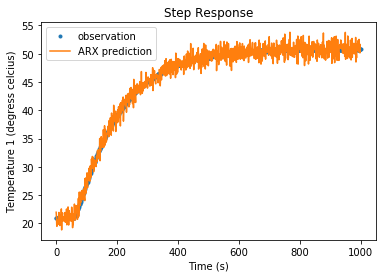

In [95]:
t = numpy.arange(len(df)-1)
plt.plot(df.Time, df.T1, '.', label = 'observation')
plt.plot(t, y_armax, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title("Step Response")
plt.legend()
plt.show()

Although it seems this fit is good, I am not sure if I have implemented the identification correctly.